# Machine Learning Project
# Haberman

## importing relavant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         * 1 = the patient survived 5 years or longer
         * 2 = the patient died within 5 year

## Loading dataset

In [2]:
import pandas as pd

dataset = "haberman.csv"
nam = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num', 'survive_after5years']
myData = pd.read_csv(dataset, names=nam)
myData

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Here's the typical order of operations in a machine learning project:

1. Data Collection: Gather our dataset.

2. Data Preprocessing:
    * Handle missing values (if any).
    * Encoding categorical variables (if applicable).
    * Feature engineering (if needed).
    * Scaling numerical features.<br><br>

3. Data Splitting: Split the data into training and testing sets.

4. Model Building: Choose a machine learning model and train it on the training data.

5. Model Evaluation: Evaluate the model's performance on the testing data.

6. Model Tuning: Adjust hyperparameters and make other model improvements based on evaluation results.

7. Final Model: Train the final model on the entire dataset (including training and testing data).

8. Inference: Use the final model for predictions on new, unseen data.

Source link: https://www.linkedin.com/pulse/unlock-power-machine-learning-data-science-ai-inbuiltdata-1f/

## Explore the Dataset

In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age_patient_operate_time  306 non-null    int64
 1   year_operate_time         306 non-null    int64
 2   axillary_node_num         306 non-null    int64
 3   survive_after5years       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
myData.describe()

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Data Preprocessing:
Since there are no missing values in our dataset and all the features are numerical, there's no need to handle missing values or encode categorical features. However, there are a few optional preprocessing steps we can consider:

## Missing values

In [5]:
import numpy as np

myData.isna().sum()

age_patient_operate_time    0
year_operate_time           0
axillary_node_num           0
survive_after5years         0
dtype: int64

## Visualization 

### Pie chart to show the percentage of survival 

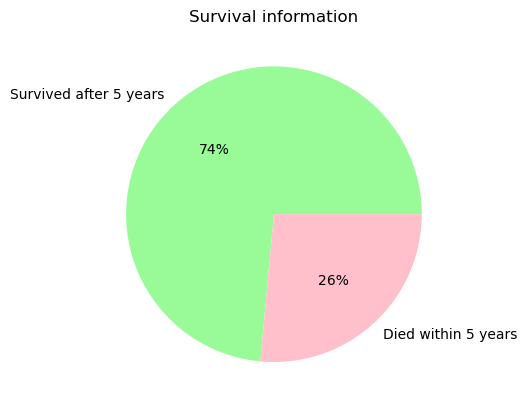

In [6]:
import matplotlib.pyplot as plt

sur = myData["survive_after5years"].value_counts()

plt.pie(x=sur, labels=["Survived after 5 years", "Died within 5 years"], colors=["#98FB98", "#FFC0CB"], autopct="%1.0f%%")
plt.title("Survival information")

plt.show()

In [7]:
myData.survive_after5years.value_counts()

survive_after5years
1    225
2     81
Name: count, dtype: int64

In this case, we can see that there is a significant class imbalance in the dataset. The class "1" has many more data points (patients who survived) compared to class "2" (patients who did not survive). Class imbalance is a common issue in machine learning, and handling it effectively is important for building accurate models. Imbalanced datasets can lead to biased model performance.

### Scatter plot to visualize the age distribution


Youngest patient was 30 old.
Oldest patient was 83 old.
Mean of the ages in patients was 52.5 years.


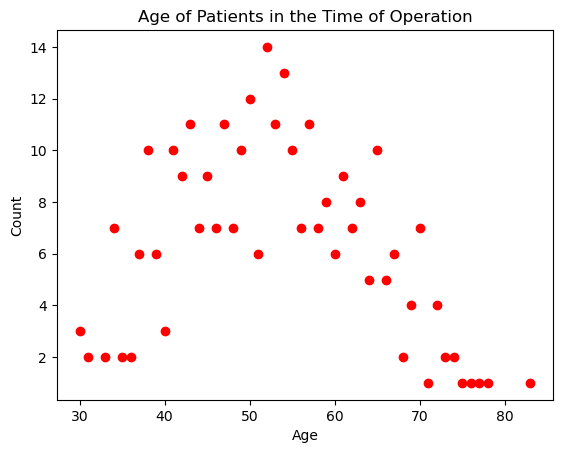

In [8]:
age = myData["age_patient_operate_time"].value_counts().sort_index()

# Extract ages (x-axis) and counts (y-axis)
ages = age.index
counts = age.values

# Create a scatter plot
plt.scatter(ages, counts, color="red")  # we can adjust the color as needed
plt.title("Age of Patients in the Time of Operation")
plt.xlabel("Age")
plt.ylabel("Count")


print(f"Youngest patient was {myData['age_patient_operate_time'].min()} old.")
print(f"Oldest patient was {myData['age_patient_operate_time'].max()} old.")
print(f"Mean of the ages in patients was {myData['age_patient_operate_time'].mean():.1f} years.")

plt.show()

### Histogram chart to visualize the count of positive nodes.

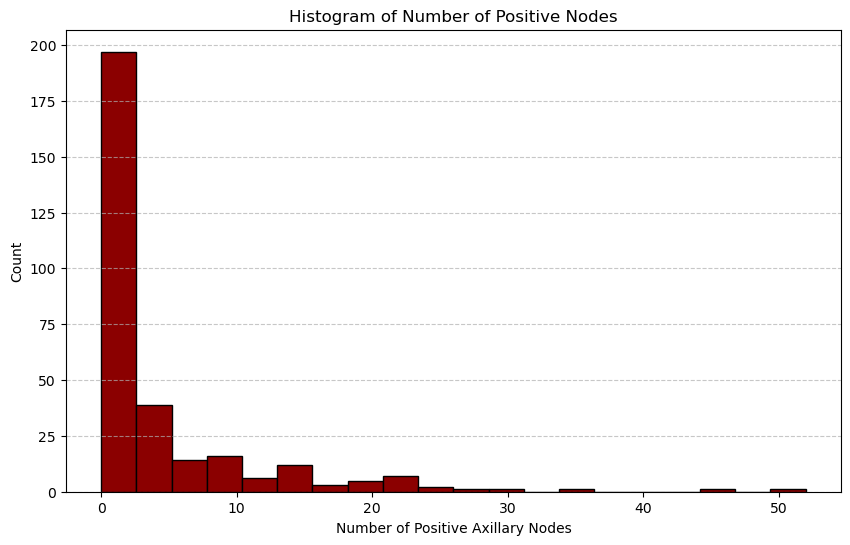

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(myData['axillary_node_num'], bins=20, color='darkred', edgecolor='black')
plt.xlabel('Number of Positive Axillary Nodes')
plt.ylabel('Count')
plt.title('Histogram of Number of Positive Nodes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Univariate analysis

Univariate analysis is like looking at one thing at a time. In this project we have "haberman" dataset with many pieces of information, where we know the age, year of operation, and the number of lymph nodes detected for different patients. When we perform univariate analysis,we're interested in just one of these pieces of information at a time.

For example let's say we want to do univariate analysis on the "age" variable. We'd focus only on the ages of the patients and see what we can learn from that one piece of information. We might do the following:

PDF (Probability Density Function): We create a chart that shows how many patients are at each age. For example, we could find that there are many patients in their 40s and 50s in the dataset, and fewer in their 30s or 70s. This gives us an idea of the distribution of ages in the data.

CDF (Cumulative Distribution Function): This chart shows us how many patients are younger or older than a specific age. For instance, we might see that about 70% of patients are younger than 60 years old. This helps us understand the cumulative distribution of ages.

Boxplot: A boxplot gives us a quick summary of the age data. It shows the median age (the middle value), the spread of ages (interquartile range), and any outliers. We can see if the ages are concentrated around a certain range or if there are outliers that represent unusual cases.

Violin Plot: This plot is like a combination of a boxplot and a PDF. It shows the distribution of ages, giving us an idea of where the ages are most concentrated and if there are multiple age "peaks" in the data.

In each of these cases, we're examining just one variable (age) to understand the patterns and characteristics of that specific variable. Univariate analysis helps us get a basic understanding of the dataset without considering the relationships between variables or the causes of certain outcomes. It's a fundamental step in data analysis to see what we have before delving into more complex analyses.

Source link: https://medium.com/aiguys/beginner-friendly-exploratory-data-analysis-on-haberman-breast-cancer-survival-dataset-4da95f314ad


### PDF(Probability Density Function)

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


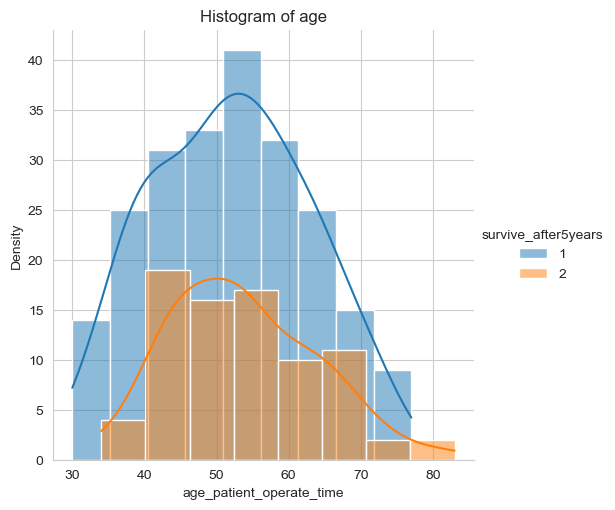

In [43]:
# visualizing how many death and survival happened in different ages

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "age_patient_operate_time", kde=True).add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


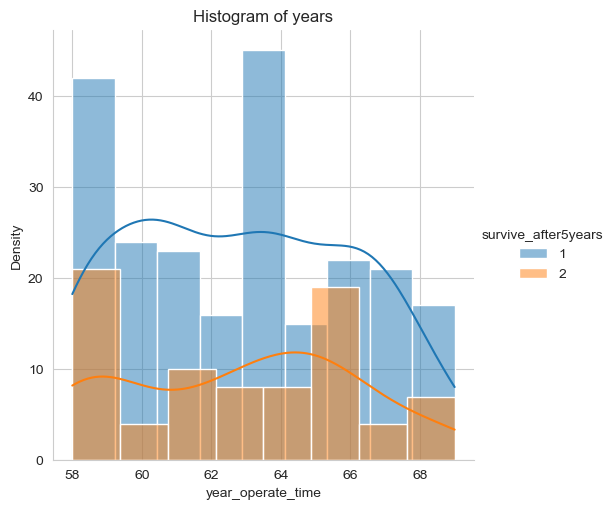

In [44]:
# visualizing how many death and survival in different years

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "year_operate_time", kde=True).add_legend()
plt.title("Histogram of years")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


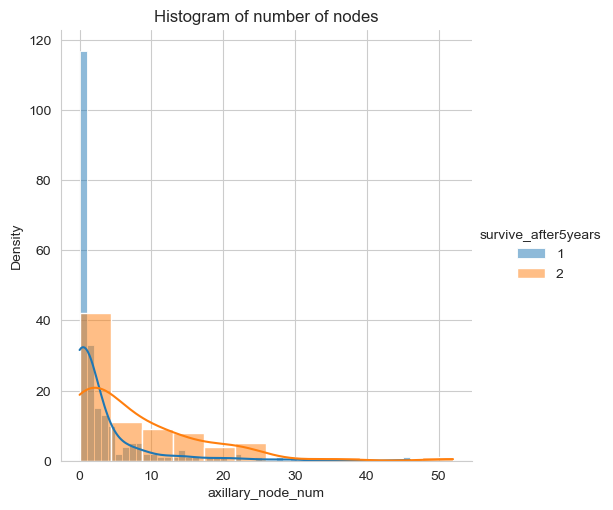

In [45]:
# visualizing how many death and survival with number of positive nudes

sns.FacetGrid(myData, hue="survive_after5years", height=5).map(sns.histplot, "axillary_node_num", kde=True).add_legend()
plt.title("Histogram of number of nodes")
plt.ylabel("Density")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

### Boxplots
The boxplot provides a statistical summary of the data as follows:

The rectangular box represents the interquartile range (IQR), with the bottom and top edges of the box corresponding to the 1st (25th percentile) and 3rd (75th percentile) quartiles, respectively.

The horizontal line inside the box represents the median (50th percentile) of the data.

These characteristics of the boxplot help visualize the central tendency, spread, and skewness of the data distribution.

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


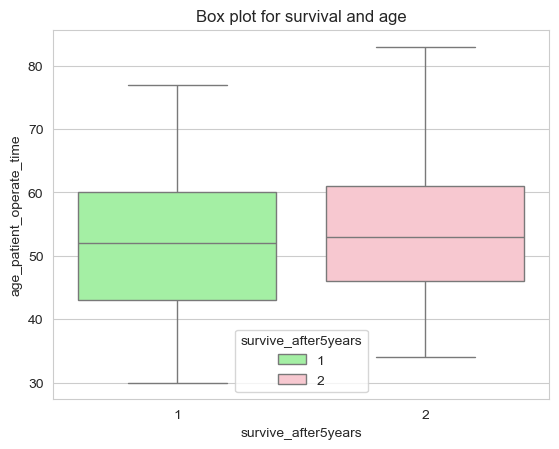

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


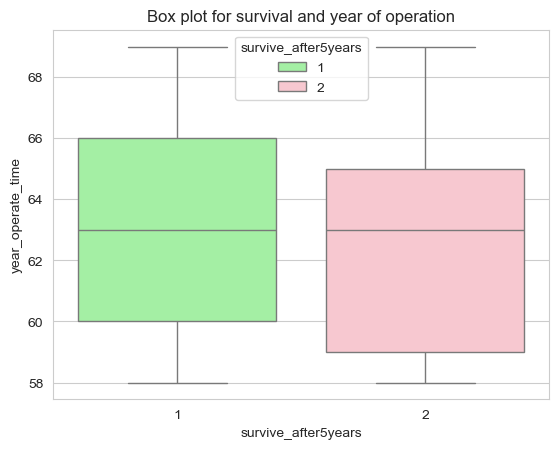

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


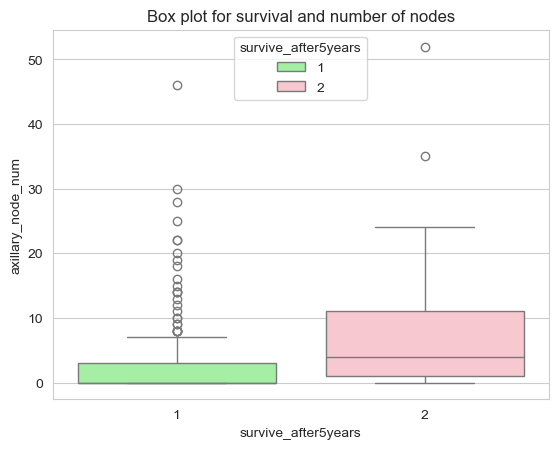

In [46]:

# plt.title("Box plot for survival_status and age") or set_title("")

sns.boxplot(x = "survive_after5years", y = "age_patient_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and age")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.boxplot(x = "survive_after5years", y = "year_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and year of operation")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.boxplot(x = "survive_after5years", y = "axillary_node_num", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"}).set_title("Box plot for survival and number of nodes")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

### Violin Plot

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


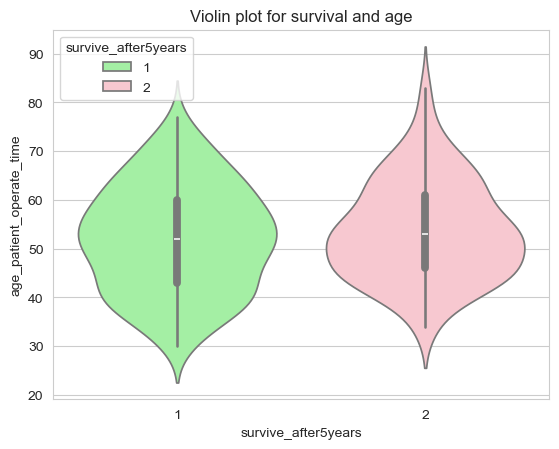

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


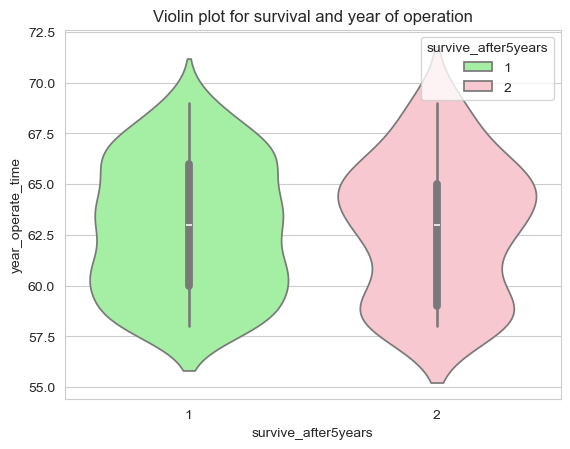

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


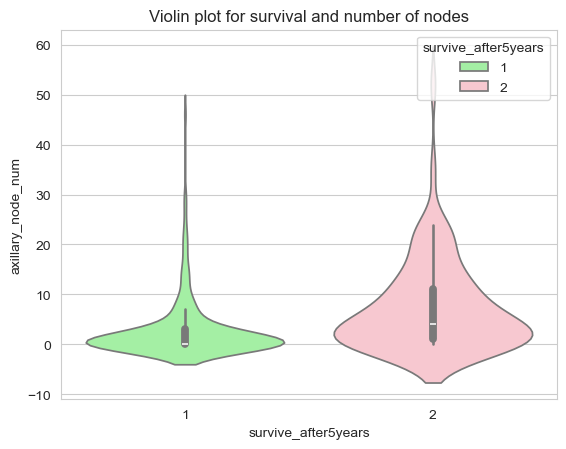

In [47]:
sns.violinplot(x = "survive_after5years", y = "age_patient_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and age")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.violinplot(x = "survive_after5years", y = "year_operate_time", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and year of operation")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.violinplot(x = "survive_after5years", y = "axillary_node_num", hue = "survive_after5years", data = myData, palette= {1: "palegreen", 2: "pink"})
plt.title("Violin plot for survival and number of nodes")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()


## Bivariate Analysis:

Bivariate analysis is a fundamental form of quantitative statistical analysis that focuses on the examination of two variables, typically represented as X and Y. Its main purpose is to discover how these two things are connected in the real world. In simpler terms, it's about understanding how two variables relate to each other through data and numbers.

### Scatter Plot:

A scatter plot serves as a valuable visual tool for illustrating the connection between two numerical variables or attributes. Typically, it is created before diving into tasks such as calculating linear correlations or fitting regression lines. The pattern that emerges from a scatter plot reveals insights into the nature of the relationship between the two variables, whether it's linear or non-linear, and provides clues about the strength of that relationship.

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


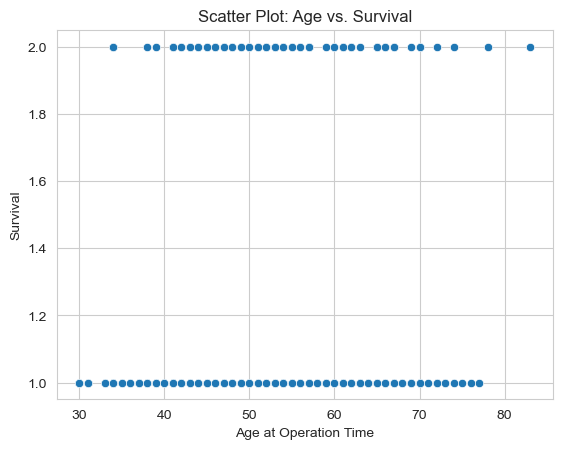

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


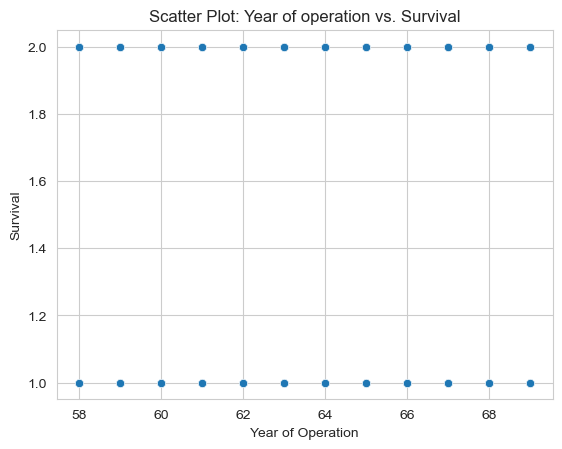

Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


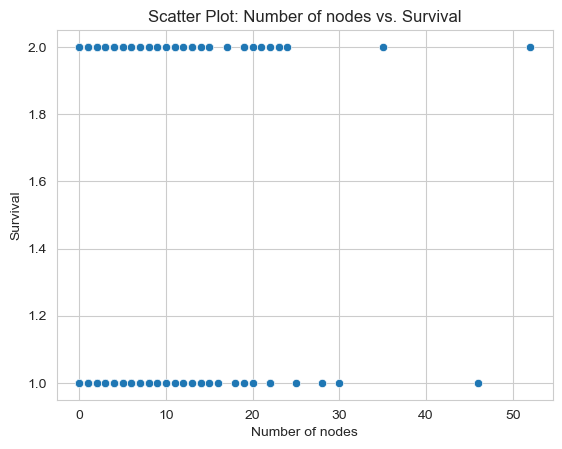

In [52]:
# Create a scatter plot
sns.scatterplot(data=myData, x="age_patient_operate_time", y="survive_after5years")
plt.title("Scatter Plot: Age vs. Survival")
plt.xlabel("Age at Operation Time")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.scatterplot(data=myData, x="year_operate_time", y="survive_after5years")
plt.title("Scatter Plot: Year of operation vs. Survival")
plt.xlabel("Year of Operation")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

sns.scatterplot(data=myData, x="axillary_node_num", y="survive_after5years")
plt.title("Scatter Plot: Number of nodes vs. Survival")
plt.xlabel("Number of nodes")
plt.ylabel("Survival")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

### Pair plot

A pair plot is like a visual cheat sheet for data. It's a way to quickly see how all the different things in our data relate to each other. It's like having a bunch of scatter plots all at once, so we can spot patterns and connections between different pieces of information. In other words, it helps us understand how everything in our data works together visually.


C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Explanation of Survival status (class attribute): 
1 = the patient survived 5 years or longer and 
2 = the patient died within 5 year


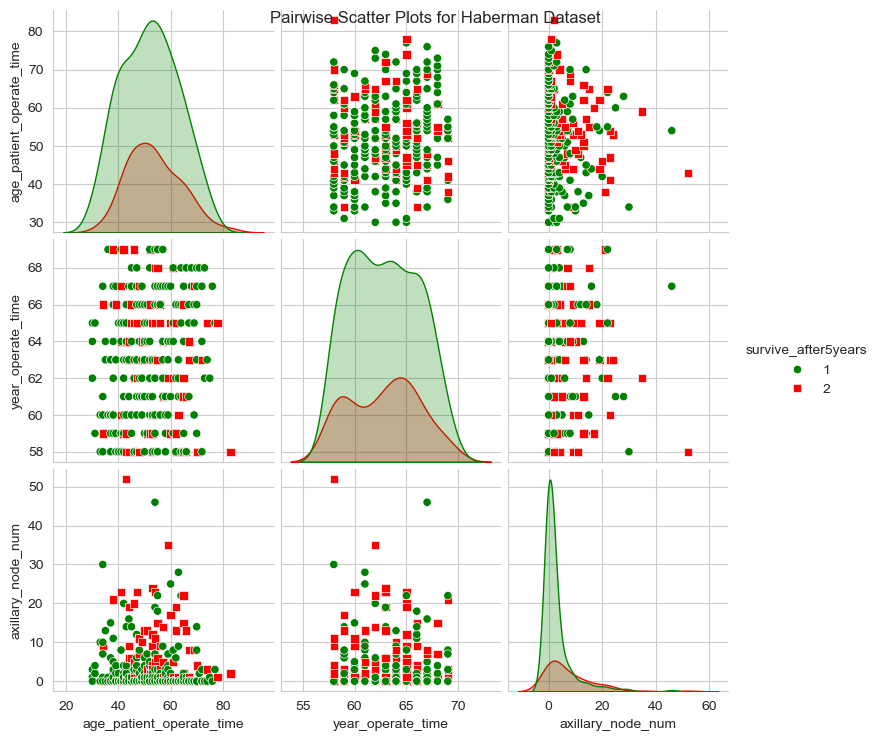

In [55]:
# Create a pairplot to visualize scatter plots for all pairs of features
sns.pairplot(myData, hue="survive_after5years", markers=["o", "s"], palette= {1: "green", 2: "red"})
plt.suptitle("Pairwise Scatter Plots for Haberman Dataset")
print("Explanation of Survival status (class attribute): \n1 = the patient survived 5 years or longer and \n2 = the patient died within 5 year" )
plt.show()

## Conclusion:

* The dataset we have is unbalanced, meaning it doesn't have an equal number of data points for each category or class.
* It's also not easy to draw a straight line to separate the different classes because there's a lot of overlap in the data points.
* To work with this dataset, we can't rely on simple rules like "if this, then that." Instead, we'll need to use more advanced techniques to handle the complexity of the data.

## Feature Scaling:
Depending on the machine learning algorithm we plan to use, it might be beneficial to scale our features. Feature scaling can help algorithms converge faster and perform better. Common scaling methods are Min-Max scaling (scaling features to a range of [0, 1]) and standardization (scaling features to have a mean of 0 and a standard deviation of 1). I use the StandardScaler from Scikit-Learn for this:

## Feature Selection:

Feature scaling is an important thing we do before teaching computers to learn from data. It's like making sure all the numbers in our data are on the same scale. This helps our computer learn without favoring big numbers over small ones. Feature scaling is extra important when our data has numbers that cover a wide range. Let's see why feature scaling is so important and when we should use it.

1. Equalizing the Impact of Features:

Some computer programs that learn from data use measurements that involve distances, like how far apart things are. But when these measurements involve numbers that are very different, it can cause problems. For example, if one number is between 0 and 1, and another number is between 0 and 1000, the big number can have too much control over the program. Feature scaling is a way to fix this issue and make sure all the numbers have a fair say in the program's decisions.

2. Faster Convergence:

Methods that use gradients, such as gradient descent, work better when we adjust the size of ourr features. When we don't do this adjustment, the process of finding the best solution might be slower and not very steady.

3. Improved Model Performance:

Some methods, such as linear regression and K-Means clustering, can be affected by how big or small the numbers in the data are. To make these methods work better and give more accurate predictions, we can adjust the size of the numbers in the data.

4. Interpretability:

Scaling features makes it easier to understand how different features affect a model and which ones are more important. When features have very different sizes, figuring out their importance can be tricky.

When should we use feature scaling:

* If we're using algorithms that depend on measuring distances or gradient descent for improving the model (like K-Nearest Neighbors, Support Vector Machines, K-Means clustering, Principal Component Analysis).
* When our data has features with different types of measurements or units.
* When we want to improve how well our machine learning model works and how quickly it learns.
* If we're using techniques that punish large coefficient values (like L1 and L2 regularization).


Common Feature Scaling Methods:

Several common methods for feature scaling include:

1. Standardization (Z-score normalization):

Rescales the data to have a mean of 0 and a standard deviation of 1. It is advantageous when the data approximates a normal distribution.

2. Min-Max Scaling:

Transforms data to a specified range, often [0, 1] or [-1, 1], while preserving the original data distribution.

3. Robust Scaling:

This method adjusts data by using the middle value and the range between the middle 50% of the numbers. It helps data not be affected too much by unusual or extreme numbers.
When we decide how to adjust our data, think about the kind of data we have and the needs of the machine learning we're using. To make the best choice, see how adjusting the data affects our model's performance for our specific dataset and problem.

For example imagine we have a list of people's salaries in a company. Some people earn really high salaries, like the CEO, while others earn average salaries. Now, if we want to find the average salary for the company, we could just add up all the salaries and divide by the number of people. But, this method can be heavily influenced by the CEO's extremely high salary. So, our average salary might not really represent what most people in the company earn. To avoid this problem, we can use a method that looks at the middle values, like the median (which is the middle number when all salaries are lined up from lowest to highest) and the range between the salaries in the middle 50% (this means the range between the 25th percentile and the 75th percentile). These middle values are less affected by extreme salaries, making our calculation more robust or resistant to these outliers.

Now, when we're deciding how to calculate averages or use this method in machine learning, we should consider the type of data we have (like salary data in this example) and the needs of our specific machine learning task. We want to choose the method that makes the most sense for our situation. To do that, we should see how the method we choose affects the performance of our machine learning model on our specific data and problem.

Source link: https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num']
myData[numerical_features] = scaler.fit_transform(myData[numerical_features])


### Encoding Categorical Variables
In our dataset, it appears that 'survive_after5years' is a categorical variable with two classes (1 and 2). We must convert it to a binary variable (e.g., 0 for survival status 1 and 1 for survival status 2) if we're performing binary classification.

In [10]:
myData['survive_after5years'] = myData['survive_after5years'].map({1: 0, 2: 1})

In [11]:
myData

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
0,-2.082140,0.353584,-0.421592,0
1,-2.082140,-0.262921,-0.142959,0
2,-2.082140,0.661837,-0.560909,0
3,-1.989426,-1.187680,-0.282275,0
4,-1.989426,0.661837,-0.003642,0
...,...,...,...,...
301,2.090018,-0.262921,-0.421592,0
302,2.182732,1.278342,-0.560909,0
303,2.275447,0.661837,-0.142959,0
304,2.368162,0.661837,-0.421592,1


# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)